In [1]:
import cv2
import numpy as np
import IPython
import math

def show(img):
    # Save the image to a temporary byte buffer
    is_success, buffer = cv2.imencode(".png", img)
    
    if is_success:
        # Display the image using IPython's display function
        IPython.display.display(IPython.display.Image(data=buffer.tobytes()))
    else:
        print("Error encoding image for display.")

def pixels_to_angle(pixels): # outputs in degrees
    theta =  ( 2 * math.atan(4.25/11) ) * ( pixels / 671.0410824679549 )
    return theta

def pixels_to_distance(pixels):
  theta = pixels * ( 2 * math.atan(4.25/11) ) / ( 671.0410824679549 )
  r_d = 69 # 69 mm
  d_c = r_d / math.sin( theta / 2 )
  return d_c

def extract_ball_position(img1,img2):
    # Calculate the absolute difference
    diff12 = cv2.absdiff(img1, img2)
    
    
    # Dilate the image
    size=15
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
    image = cv2.dilate(diff12, kernel_dilate, iterations=1)
    
    # Apply Threshold to the image
    ret, image = cv2.threshold(image, 64, 255, cv2.THRESH_BINARY)
    image = cv2.erode(image, kernel_dilate, iterations=1)
    
    
    # Find contours
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contours, hierarchy = cv2.findContours(grey_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Isolate contour with the greatest moment
    greatest_counter, greatest_moment = sorted( 
        [ [ contour, cv2.moments(contour) ] for contour in contours ],
        key=lambda x: x[1]['m00']
    )[-1]
    
    # find center of mass
    pixel_area = greatest_moment['m00']
    alpha_x_pixels = greatest_moment['m10']/pixel_area - 1920/2
    alpha_y_pixels = 1080/2 - greatest_moment['m01']/pixel_area
    alpha_x = pixels_to_angle(alpha_x_pixels)/math.pi*180
    alpha_y = pixels_to_angle(alpha_y_pixels)/math.pi*180
    
    # Find minimum area rectangle, thereby determining the shortest width/theta
    obj = cv2.minAreaRect(greatest_counter)
    print(obj)
    points = cv2.boxPoints(obj)
    points = np.array([[ [[int(point[0]),int(point[1])]] for point in points]])
    
    #calculate ball diameter in pixels
    d_b_pixels = min( obj[1])
    distance = pixels_to_distance(d_b_pixels)/1000

    return {
        "alpha":(alpha_x,alpha_y), # degrees ( right, up )
        'distance':distance # meters
    }

In [3]:
framepaths=[f"G:\\My Drive\\School\\2025 _Spring\\EE 497\\Frame-by-frame demo 01\\0{i}.png" for i in range(1,4) ]

https://stackoverflow.com/questions/56183201/detect-and-visualize-differences-between-two-images-with-opencv-python

In [140]:
def angle_to_pixels(theta): # outputs in degrees
    pixels =  (671.0410824679549) * theta / ( 2 * math.atan(4.25/11) )
    return pixels

def distance_to_pixels(d_c):
    r_d = 69 # 69 mm
    theta = 2 * math.asin( r_d / d_c )
    pixels = angle_to_pixels(theta)
    return pixels


In [6]:
# Load two images for difference calculation
img1 = cv2.imread( framepaths[1] )
img2 = cv2.imread( framepaths[2] )

# Extract ball position
extract_ball_position(img1,img2)

((1048.68408203125, 317.7688903808594), (91.49513244628906, 95.86592102050781), 29.05460548400879)


{'alpha': (5.6504356212051405, 13.872443131571433),
 'distance': 1.3731400576264323}

In [18]:
# Calculate the absolute difference
diff12 = cv2.absdiff(img1, img2)


# Dilate the image
size=15
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
image = cv2.dilate(diff12, kernel_dilate, iterations=1)

# Apply Threshold to the image
ret, image = cv2.threshold(image, 64, 255, cv2.THRESH_BINARY)
image = cv2.erode(image, kernel_dilate, iterations=1)


# Find contours
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(grey_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Isolate contour with the greatest moment
temp = sorted( 
    [ [ contour, cv2.moments(contour) ] for contour in contours ],
    key=lambda x: x[1]['m00']
)[-2:]
greatest_counters = [ item[0] for item in temp ]
greatest_moments = [ item[1] for item in temp ]


In [102]:
combined_contour = np.array([list(greatest_counters[0]) + list(greatest_counters[1])])

array([[[ 990,  361]],

       [[ 990,  362]],

       [[ 988,  364]],

       [[ 987,  364]],

       [[ 986,  365]],

       [[ 985,  365]],

       [[ 984,  366]],

       [[ 983,  366]],

       [[ 983,  367]],

       [[ 982,  368]],

       [[ 977,  368]],

       [[ 976,  369]],

       [[ 975,  369]],

       [[ 974,  370]],

       [[ 964,  370]],

       [[ 964,  377]],

       [[ 963,  378]],

       [[ 963,  379]],

       [[ 962,  380]],

       [[ 962,  382]],

       [[ 961,  383]],

       [[ 961,  386]],

       [[ 960,  387]],

       [[ 960,  389]],

       [[ 962,  389]],

       [[ 964,  391]],

       [[ 964,  445]],

       [[ 965,  446]],

       [[ 965,  447]],

       [[ 965,  423]],

       [[ 966,  422]],

       [[ 980,  422]],

       [[ 981,  423]],

       [[ 982,  423]],

       [[ 984,  425]],

       [[ 984,  429]],

       [[ 986,  431]],

       [[ 986,  433]],

       [[ 987,  433]],

       [[ 988,  434]],

       [[ 988,  437]],

       [[ 989,  

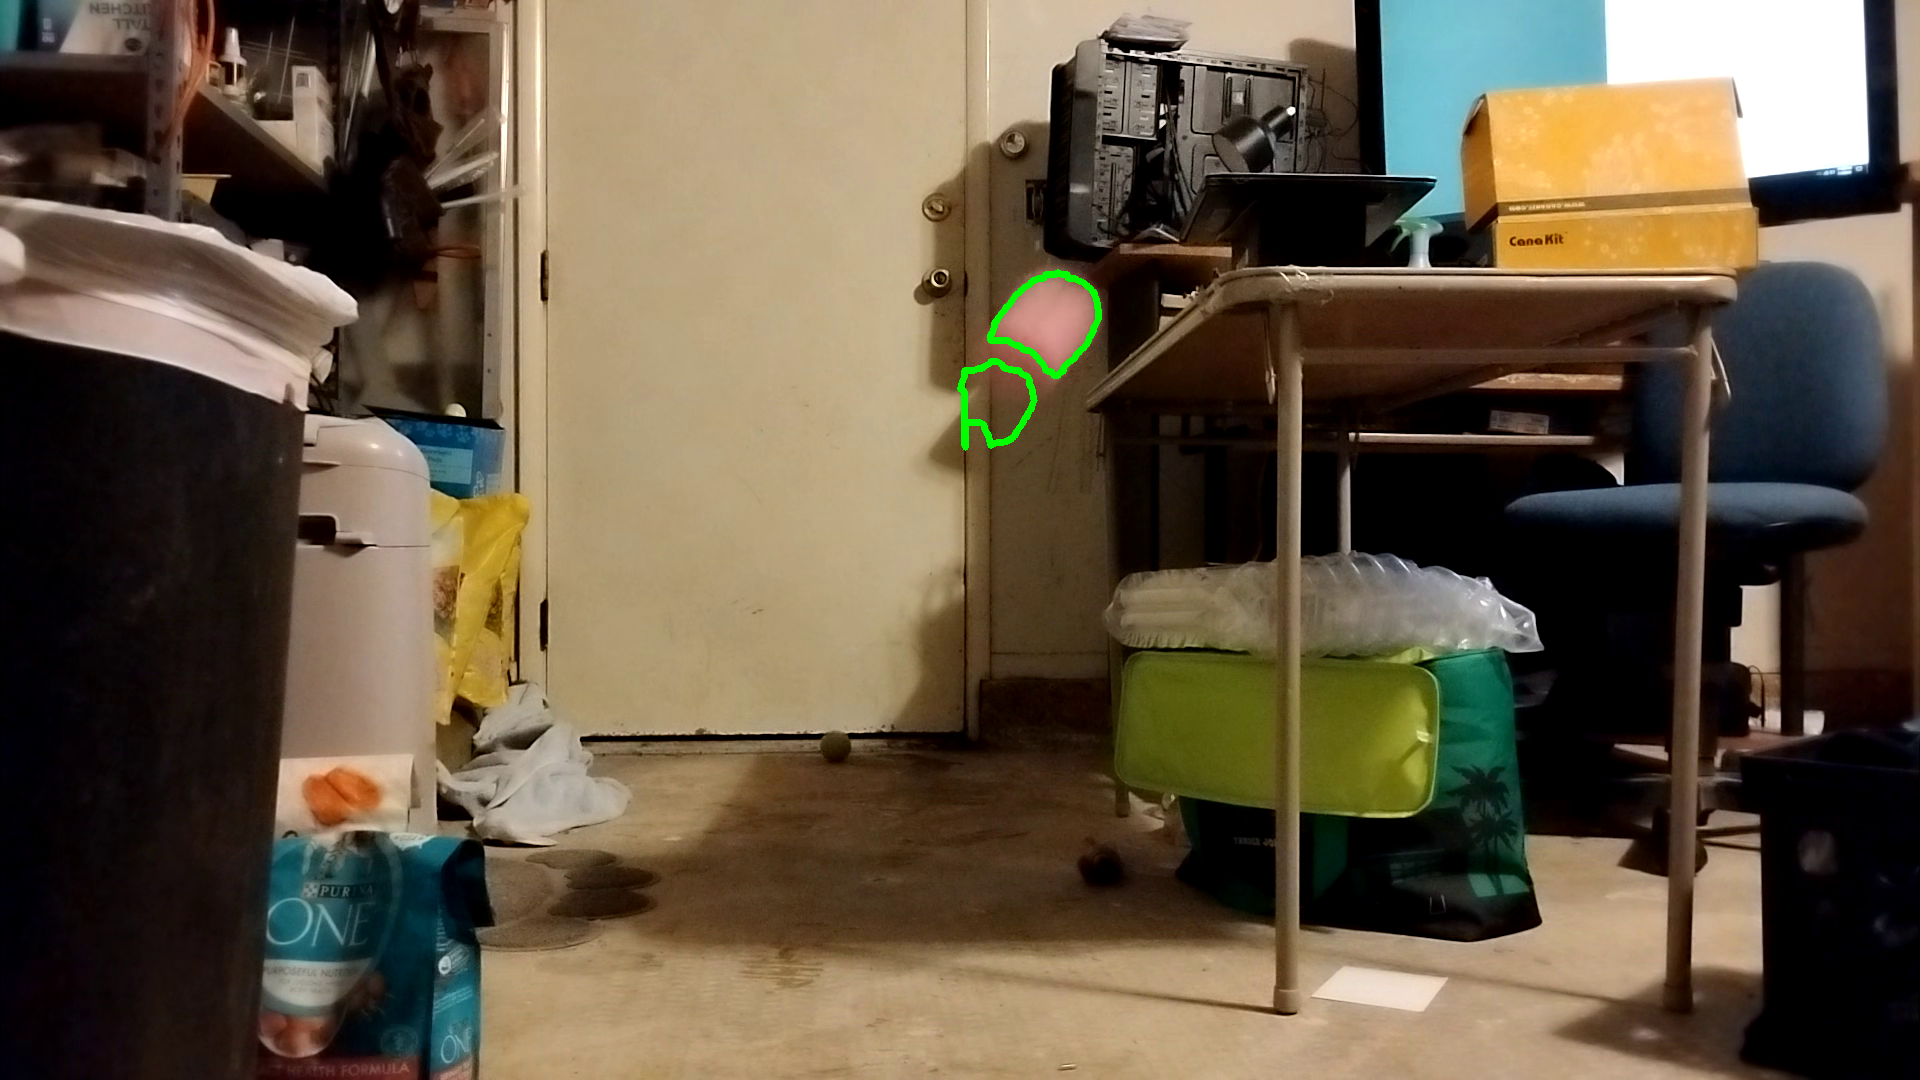

In [201]:
image=img1.copy()
# Draw all contours on the original image
cv2.drawContours(image, greatest_counters, -1, (0, 255, 0), 5)
# Draw a specific contour (e.g., the first contour)
#cv2.drawContours(image, [greatest_counters[0]], -1, (255, 0, 0), 2)
# To fill the contours
#cv2.drawContours(image, contours, -1, (0, 0, 0), cv2.FILLED)
show(image)

In [170]:
# find center of mass
pixel_areas = [ item['m00'] for item in greatest_moments ] 
alpha_x_pixels = [ item['m10']/item['m00'] - 1920/2 for item in greatest_moments ]
alpha_y_pixels = [ 1080/2 - item['m01']/item['m00'] for item in greatest_moments ]

weighted_centers = list( zip(pixel_areas,zip(alpha_x_pixels,alpha_y_pixels)) )
# [(4187.5, (-346.0060815615881, 293.6062924544496)),
#  (6796.5, (89.744966772113, 220.3337992594228))]
total_mass = sum( [ x[0] for x in weighted_centers] )
weighted_avg_center = sum( [ x[0]*np.array(x[1]) for x in weighted_centers ] ) / total_mass

alpha_x = pixels_to_angle(weighted_avg_center[0])/math.pi*180
alpha_y = pixels_to_angle(weighted_avg_center[1])/math.pi*180


In [172]:
alpha_x, alpha_y

(np.float64(4.373345961602767), np.float64(11.946396082258477))

In [174]:
weighted_centers

[(4187.5, (36.53962189054721, 140.0919800995025)),
 (6796.5, (89.744966772113, 220.3337992594228))]

In [112]:


# Find minimum area rectangle, thereby determining the shortest width/theta
obj = cv2.minAreaRect(combined_contour[0])
print(obj)
points = cv2.boxPoints(obj)
points = np.array([[ [[int(point[0]),int(point[1])]] for point in points]])

#calculate ball diameter in pixels
d_b_pixels = min( obj[1])
distance = pixels_to_distance(d_b_pixels)/1000

((1018.5194702148438, 360.13458251953125), (86.84941101074219, 202.76190185546875), 38.09967041015625)


In [80]:
greatest_counters

[array([[[ 990,  361]],
 
        [[ 990,  362]],
 
        [[ 988,  364]],
 
        [[ 987,  364]],
 
        [[ 986,  365]],
 
        [[ 985,  365]],
 
        [[ 984,  366]],
 
        [[ 983,  366]],
 
        [[ 983,  367]],
 
        [[ 982,  368]],
 
        [[ 977,  368]],
 
        [[ 976,  369]],
 
        [[ 975,  369]],
 
        [[ 974,  370]],
 
        [[ 964,  370]],
 
        [[ 964,  377]],
 
        [[ 963,  378]],
 
        [[ 963,  379]],
 
        [[ 962,  380]],
 
        [[ 962,  382]],
 
        [[ 961,  383]],
 
        [[ 961,  386]],
 
        [[ 960,  387]],
 
        [[ 960,  389]],
 
        [[ 962,  389]],
 
        [[ 964,  391]],
 
        [[ 964,  445]],
 
        [[ 965,  446]],
 
        [[ 965,  447]],
 
        [[ 965,  423]],
 
        [[ 966,  422]],
 
        [[ 980,  422]],
 
        [[ 981,  423]],
 
        [[ 982,  423]],
 
        [[ 984,  425]],
 
        [[ 984,  429]],
 
        [[ 986,  431]],
 
        [[ 986,  433]],
 
        [[ 9

In [78]:
sum(list(x) for x in greatest_counters)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

Distance: 1.45 m 


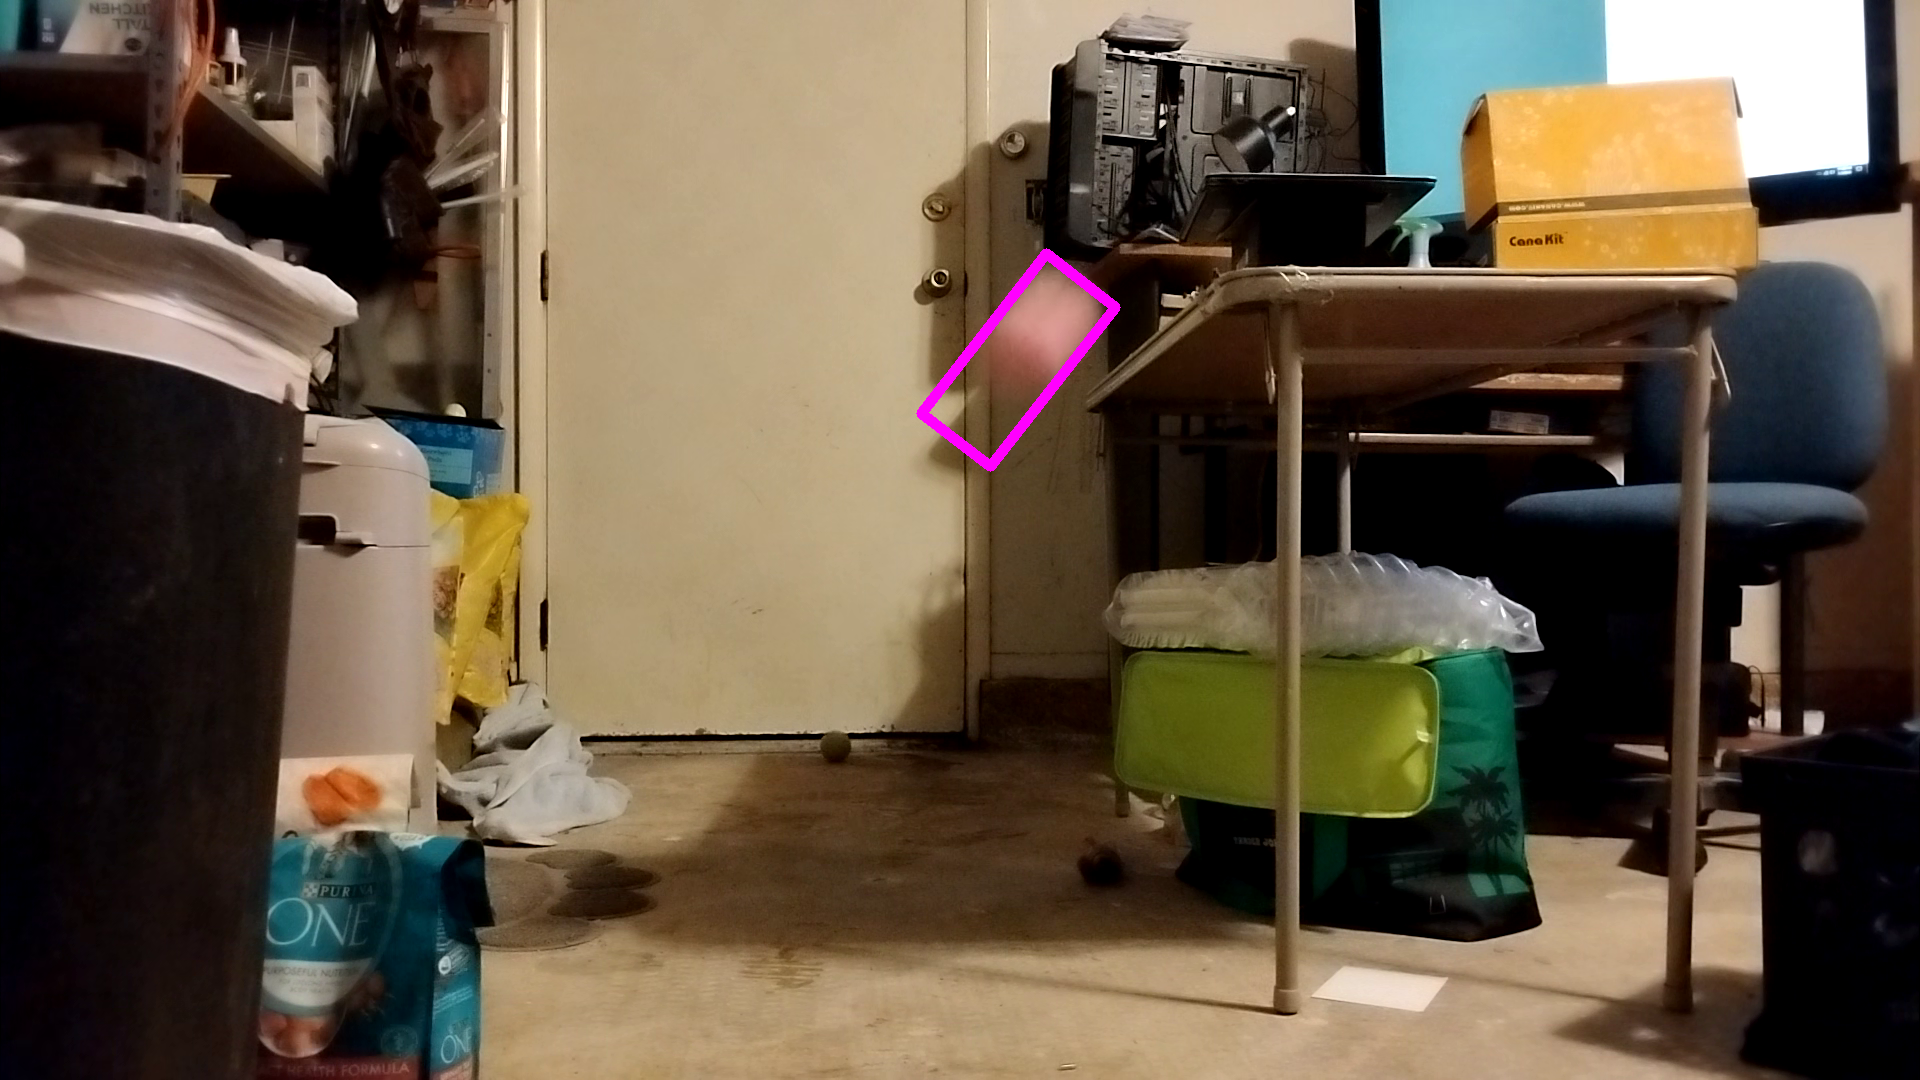

In [118]:
# Find minimum area rectangle, thereby determining the shortest width/theta
obj = cv2.minAreaRect(combined_contour[0])
points = cv2.boxPoints(obj)
points = np.array([[ [[int(point[0]),int(point[1])]] for point in points]])

#calculate ball diameter in pixels
d_b_pixels = min( obj[1])
distance = pixels_to_distance(d_b_pixels)/1000
print(f"Distance: {distance:.2f} m ")

points = cv2.boxPoints(obj)
points = np.array([[ [[int(point[0]),int(point[1])]] for point in points]])

markup = img1.copy()
markup = cv2.drawContours(markup,points,-1,(255,00,255),10)
show(markup)

In [190]:
x = int( 1920/2 + angle_to_pixels( alpha_x/180 * math.pi ) )
y = int( 1080 / 2 - angle_to_pixels( alpha_y/180 * math.pi ) )
radius = int( distance_to_pixels(distance*1000) / 2 )
print( x, y, radius )

1029 350 43


In [192]:
angle_to_pixels( pixels_to_angle( 1000 ) )

1000.0

In [209]:
print(f"""alpha_x: \t{alpha_x:.3f} degrees right
alpha_y: \t{alpha_y:.3f} degrees up
distance: \t{distance:.3f} meters away""")

alpha_x: 	4.373 degrees right
alpha_y: 	11.946 degrees up
distance: 	1.447 meters away


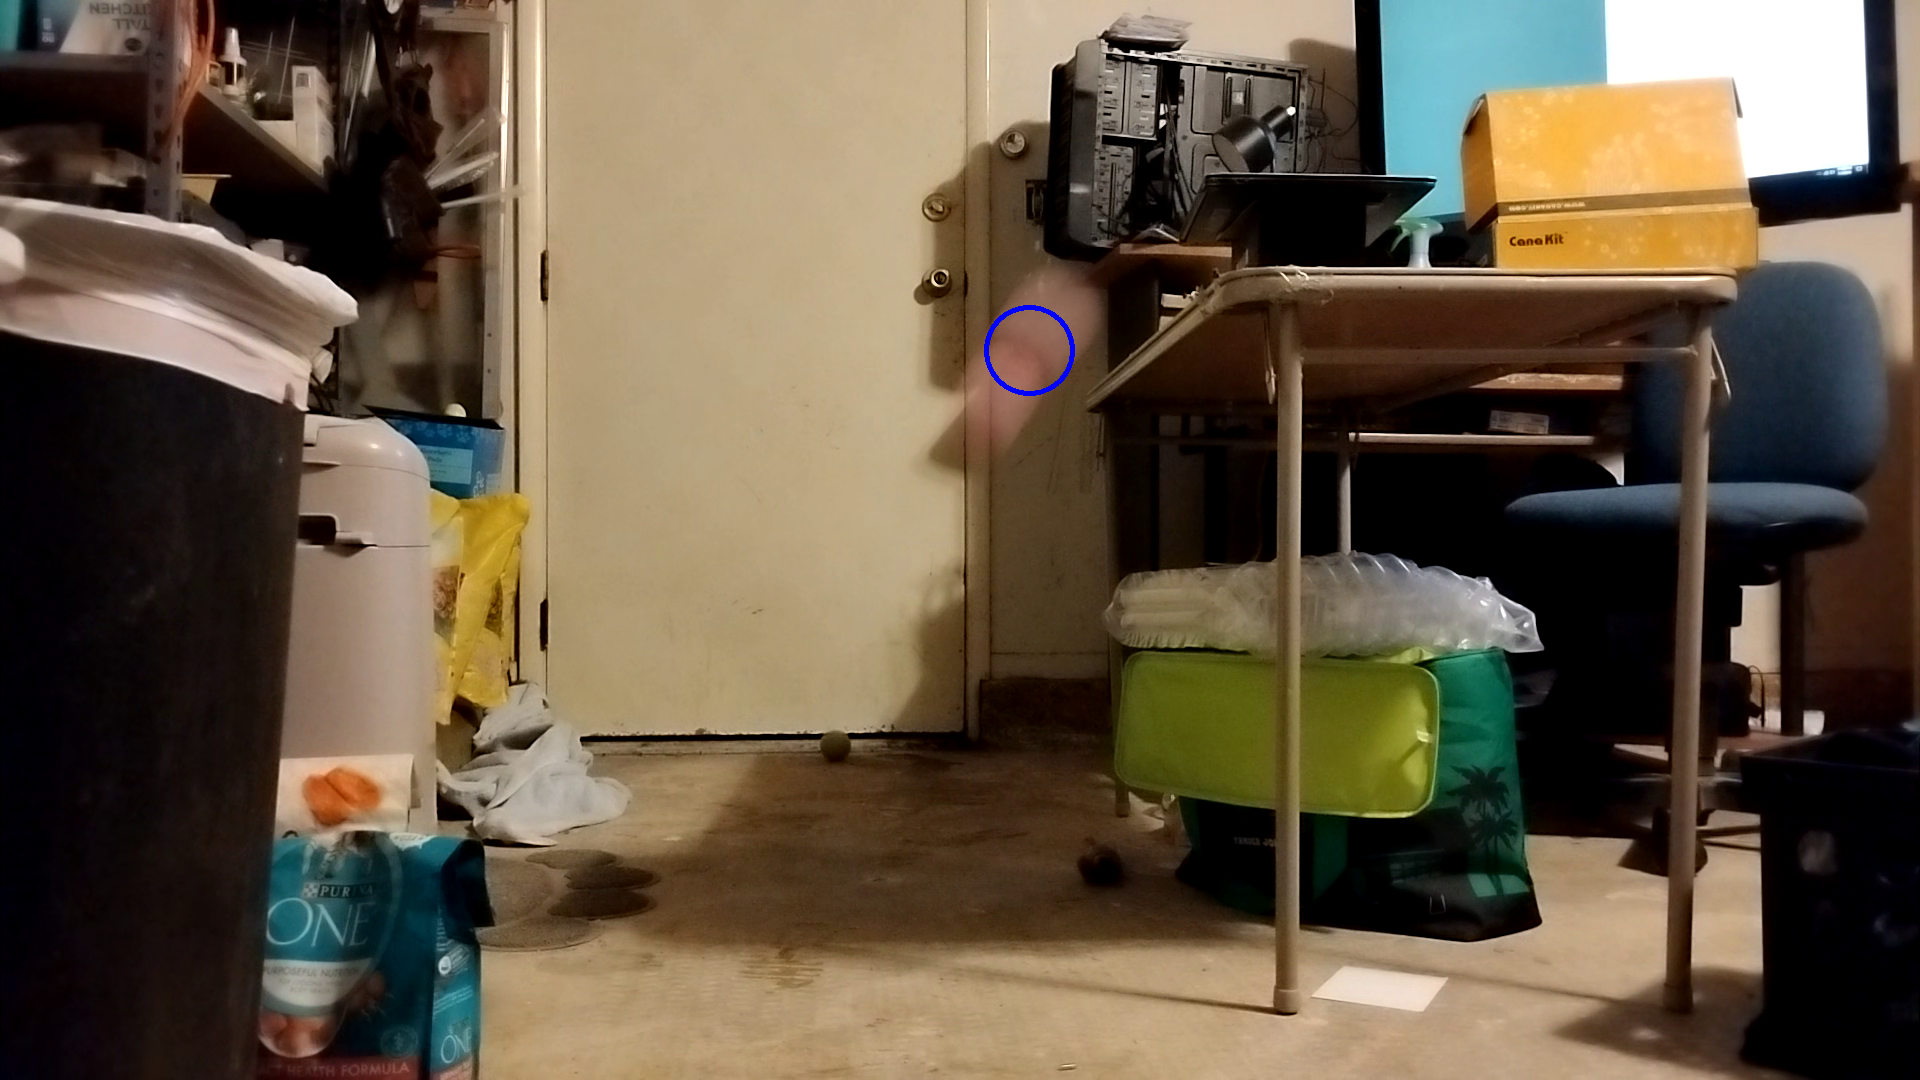

In [194]:
markup = img1.copy()
markup = cv2.addWeighted(img1,0.5,img2,0.5,0)
alpha_x, alpha_y, distance

markup = cv2.circle(markup, (x,y), radius, (255,0,0), 3)
show(markup)

In [197]:
import cv2
import numpy as np
import IPython
import math

def show(img):
    # Save the image to a temporary byte buffer
    is_success, buffer = cv2.imencode(".png", img)
    
    if is_success:
        # Display the image using IPython's display function
        IPython.display.display(IPython.display.Image(data=buffer.tobytes()))
    else:
        print("Error encoding image for display.")

def pixels_to_angle(pixels): # outputs in degrees
    theta =  ( 2 * math.atan(4.25/11) ) * ( pixels / 671.0410824679549 )
    return theta

def pixels_to_distance(pixels):
  theta = pixels * ( 2 * math.atan(4.25/11) ) / ( 671.0410824679549 )
  r_d = 69 # 69 mm
  d_c = r_d / math.sin( theta / 2 )
  return d_c

framepaths=[f"G:\\My Drive\\School\\2025 _Spring\\EE 497\\Frame-by-frame demo 01\\0{i}.png" for i in range(1,4) ]

# https://stackoverflow.com/questions/56183201/detect-and-visualize-differences-between-two-images-with-opencv-python

def angle_to_pixels(theta): # outputs in degrees
    pixels =  (671.0410824679549) * theta / ( 2 * math.atan(4.25/11) )
    return pixels

def distance_to_pixels(d_c):
    r_d = 69 # 69 mm
    theta = 2 * math.asin( r_d / d_c )
    pixels = angle_to_pixels(theta)
    return pixels


# Load two images for difference calculation
img1 = cv2.imread( framepaths[1] )
img2 = cv2.imread( framepaths[2] )

def extract_ball_position(img1,img2):
    # Calculate the absolute difference
    diff12 = cv2.absdiff(img1, img2)
    
    # Dilate the image
    size=15
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
    image = cv2.dilate(diff12, kernel_dilate, iterations=1)
    
    # Apply Threshold to the image
    ret, image = cv2.threshold(image, 64, 255, cv2.THRESH_BINARY)
    image = cv2.erode(image, kernel_dilate, iterations=1)
    
    # Find contours
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contours, hierarchy = cv2.findContours(grey_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Isolate two contours with the greatest moment
    temp = sorted( 
        [ [ contour, cv2.moments(contour) ] for contour in contours ],
        key=lambda x: x[1]['m00']
    )[-2:]
    greatest_counters = [ item[0] for item in temp ]
    greatest_moments = [ item[1] for item in temp ]
    
    #combined contours into one "contour"
    combined_contour = np.array([list(greatest_counters[0]) + list(greatest_counters[1])])

    # Draw all contours on the original image
    
    # image=img1.copy()
    # cv2.drawContours(image, combined_contour, -1, (0, 255, 0), -1)
    # show(image)
    
    # find center of mass
    pixel_areas = [ item['m00'] for item in greatest_moments ] 
    alpha_x_pixels = [ item['m10']/item['m00'] - 1920/2 for item in greatest_moments ]
    alpha_y_pixels = [ 1080/2 - item['m01']/item['m00'] for item in greatest_moments ]
    
    weighted_centers = list( zip(pixel_areas,zip(alpha_x_pixels,alpha_y_pixels)) )
    # [(4187.5, (-346.0060815615881, 293.6062924544496)),
    #  (6796.5, (89.744966772113, 220.3337992594228))]
    total_mass = sum( [ x[0] for x in weighted_centers] )
    weighted_avg_center = sum( [ x[0]*np.array(x[1]) for x in weighted_centers ] ) / total_mass

    # alpha_x, alpha_y are angles in degrees up/right from center/forward
    alpha_x = pixels_to_angle(weighted_avg_center[0])/math.pi*180
    alpha_y = pixels_to_angle(weighted_avg_center[1])/math.pi*180   
    
    # Find minimum area rectangle, thereby determining the shortest width/theta
    obj = cv2.minAreaRect(combined_contour[0])
    # print(obj)
    points = cv2.boxPoints(obj)
    points = np.array([[ [[int(point[0]),int(point[1])]] for point in points]])
    
    #calculate ball diameter in pixels
    d_b_pixels = min( obj[1])
    distance = pixels_to_distance(d_b_pixels)/1000
   
    # Find minimum area rectangle, thereby determining the shortest width/theta
    obj = cv2.minAreaRect(combined_contour[0])
    points = cv2.boxPoints(obj)
    points = np.array([[ [[int(point[0]),int(point[1])]] for point in points]])
    
    #calculate ball diameter in pixels
    d_b_pixels = min( obj[1])
    distance = pixels_to_distance(d_b_pixels)/1000
    print(f"Distance: {distance:.2f} m ")
    
    points = cv2.boxPoints(obj)
    points = np.array([[ [[int(point[0]),int(point[1])]] for point in points]])
    
    # markup = img1.copy()
    # markup = cv2.drawContours(markup,points,-1,(255,00,255),10)
    # show(markup)
    
    x = int( 1920/2 + angle_to_pixels( alpha_x/180 * math.pi ) )
    y = int( 1080 / 2 - angle_to_pixels( alpha_y/180 * math.pi ) )
    radius = int( distance_to_pixels(distance*1000) / 2 )
    # print( x, y, radius )
    
    # markup = img1.copy()
    # markup = cv2.addWeighted(img1,0.5,img2,0.5,0)
    # alpha_x, alpha_y, distance
    # markup = cv2.circle(markup, (x,y), radius, (255,0,0), 3)
    # show(markup)

    return {
        'distance':distance,
        'alpha':(alpha_x, alpha_y)
    }